#  ***HAND WRITTEN DIGIT RECOGNITION*** 
    This project aims to use Convolutional Neural Network to identify 
    handwritten digits as 0-9



**Importing the libraries**

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


**LOADING THE DATA AND SPLITTING INTO TRAINING AND TEST SETS**

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

**Getting the Image Shape**

In [0]:
print(x_train.shape)
print(x_test.shape)

OUTPUT

(60000, 28, 28)

(10000, 28, 28)

**Visualising the first input from the training set**

In [0]:
x_train[10]

array(
        [ 
          
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
          
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254,
        254, 254, 254, 254, 238,  70,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 104, 244,
        254, 224, 254, 254, 254, 141,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207,
        254, 210, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84,
        206, 254, 254, 254, 254,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         24, 209, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  91,
        137, 253, 254, 254, 254, 112,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 214, 250,
        254, 254, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 247, 254,
        254, 254, 254, 254, 254, 146,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 246,
        254, 254, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  73,
         89,  89,  93, 240, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1, 128, 254, 219,  31,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7, 254, 254, 214,  28,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 138, 254, 254, 116,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  19, 177,  90,   0,   0,   0,   0,
          0,  25, 240, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 164, 254, 215,  63,  36,   0,  51,
         89, 206, 254, 254, 139,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  57, 197, 254, 254, 222, 180, 241,
        254, 254, 253, 213,  11,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 140, 105, 254, 254, 254, 254,
        254, 254, 236,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7, 117, 117, 165, 254,
        254, 239,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=uint8)

**Visualising the inputs of the training set as an image**

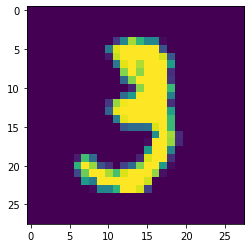

In [0]:
plt.imshow(x_train[10])

**visualising the output of first training set as a value**

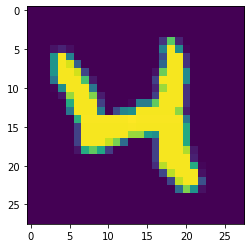

In [0]:
plt.imshow(x_train[20])

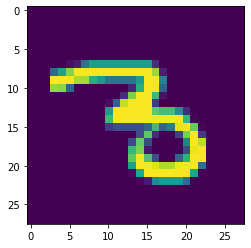

In [0]:
plt.imshow(x_train[30])

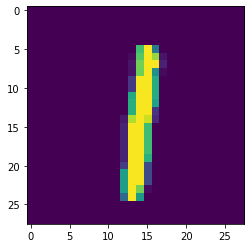

In [0]:
plt.imshow(x_train[40])

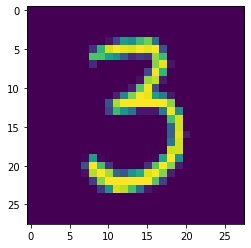

In [0]:
plt.imshow(x_train[50])

In [0]:
y_train[10]


3

In [0]:
y_train[20]

4

In [0]:
y_train[30]

3

In [0]:
y_train[40]

1

In [0]:
y_train[50]

3

**Reshaping the data to fit the training model**

Before using the data as an input 

* It needs to be reshaped in a specific format and only after that it can be reused. 
* 'reshape'function is used to convert all the images present in the data set in a specified format
*   Total number of images in the training set is 60,000 ans=d that in the test set is 10,000
*   28 by 28 is the shape of each image and 1 is used in order to signify that images are grayscale(it means it is composed of only white and dark colour)



In [0]:
x_train=x_train.reshape(60000,28,28,1)
x_test =x_test.reshape(10000,28,28,1)

**One-hot  encoding the y_train and y_test**

In [0]:
y_train_hot= to_categorical(y_train)
y_test_hot=to_categorical(y_test)

**Printing the encoded y_train value**

In [0]:
y_train_hot[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_train_hot[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_train_hot[30]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_train_hot[40]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_train_hot[50]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Constructing the Convolutional Neural Network Model**

Steps for constructing the CNN Model as follows-

1.The model type that  is used is  Sequential. Sequential is the easiest way to build a model in Keras. It allows us to build a model layer by layer.We use the ‘add()’ function to add layers to our model.
Our first layer is Conv2D layers. After this MaxPooling is applied which further compresses the 2-D image matrix. Again Conv2D layer is added follwed by the MaxPooling step. These are convolution layers that will deal with input images, which are seen as 2-dimensional matrices.
The first layer will comprise of 64 nodes.

Kernel size is the size of the filter matrix for our convolution. So a kernel size of 3 means we will have a 3x3 filter matrix.

Activation is the activation function for the layer. The activation function we will be using for our first 2 layers is the ReLU, or Rectified Linear Activation. 

2.The output from the convolution layers is converted into flat vector in order so that it can be treated as an input to the hidden layers .

3.‘Dense’ is the layer type we will use in for our output layer. Dense is a standard layer type that is used in many cases for neural networks.
4.The activation is ‘softmax’. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.


In [0]:
#Building the CNN Model
CNN_model=Sequential()
#Performing Convolution
CNN_model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
#Performing pooling
CNN_model.add(MaxPooling2D(pool_size=(2,2)))
#Performing Convolution
CNN_model.add(Conv2D(64,kernel_size=3,activation='relu'))
#Performin pooling 
CNN_model.add(MaxPooling2D(pool_size=(2,2)))
#Performing Flattening
CNN_model.add(Flatten())
#Adding numbers of nodes in hidden 
CNN_model.add(Dense(10,activation='softmax'))

**Compiling the model build so far**

1.Compiling the model takes three parameters: optimizer, loss and metrics.

2.The optimizer controls the learning rate.  ‘adam’ as an optmizer is used. Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.

3.The ‘categorical_crossentropy’ is used as a loss function. This is the most common choice for classification. A lower score indicates that the model is performing better.

4.The ‘accuracy’ metric is used to see the accuracy score on the validation set when we train the model

In [0]:
CNN_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Fitting the CNN_model to the images**

1.To train the model, ‘fit()’ function is used on our model with the following parameters: training data , test data , validation data, and the number of epochs.

2.For our validation data, we will use the test set provided to us in our dataset, which we have split into X_test and y_test_hot

3.The model will run according to the number of epochs that has been alloted.
Larger the number of epochs better the accuracy will be obtained.After some finite number of epochs the accuracy value will stop increasing and will converge at a specific value.

In [0]:
var=CNN_model.fit(x_train,y_train_hot,validation_data=(x_test,y_test_hot),epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.2864 - accuracy: 0.9451 - val_loss: 0.0963 - val_accuracy: 0.9712

Epoch 2/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0711 - accuracy: 0.9787 - val_loss: 0.0645 - val_accuracy: 0.9804

Epoch 3/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0597 - accuracy: 0.9822 - val_loss: 0.0704 - val_accuracy: 0.9800

Epoch 4/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0503 - accuracy: 0.9850 - val_loss: 0.0475 - val_accuracy: 0.9862

Epoch 5/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0460 - accuracy: 0.9864 - val_loss: 0.0515 - val_accuracy: 0.9856

Epoch 6/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.0513 - val_accuracy: 0.9843

Epoch 7/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0376 - accuracy: 0.9887 - val_loss: 0.0643 - val_accuracy: 0.9838

Epoch 8/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0362 - accuracy: 0.9900 - val_loss: 0.0786 - val_accuracy: 0.9832

Epoch 9/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0305 - accuracy: 0.9918 - val_loss: 0.0771 - val_accuracy: 0.9854

Epoch 10/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0302 - accuracy: 0.9917 - val_loss: 0.0803 - val_accuracy: 0.9841

#  Accuracy at some  epochs

**Epoch 1**
The accuracy obtained on the training set data is 94.51 and the encoded test set
is 97.12% 

**Epoch 2**
The accuracy obtained on the training set data is 97.87 and the encoded test set
is 98.04%

**Epoch 10**

The accuracy obtained on the training set data is 99.17 and the encoded test set
is 98.41%

**Final accuracy on the test set data**
98.41%